### Adding descriptors

In [1]:
from rdkit import Chem
import pandas as pd
import torch
from tqdm import tqdm

tqdm.pandas()

In [2]:
data = pd.read_csv('data_10k.csv')
data.head()

,Molecular Weight,Bioactivities,AlogP,Polar Surface Area,CX Acidic pKa,CX Basic pKa,Smiles,ecfp1,ecfp2,ecfp3
0,478.57,12.0,5.88,52.83,NaN,4.26,COc1cc(C2(C)CCCc3nc(SCc4ncccn4)n(-c4ccc(F)cc4)...,"['2246728737', '864674487', '3217380708', '321...","['3975275337', '2076190208', '1135286194', '99...","['932712697', '2628046163', '3102147921', '424..."
1,437.47,17.0,4.51,90.93,10.14,NaN,COC(=O)c1sc(NC(=O)C2c3ccccc3Oc3ccccc32)c(C(=O)...,"['2246728737', '864674487', '2246699815', '864...","['3975275337', '2154935424', '2827868305', '15...","['1673980810', '3163669616', '2541195453', '15..."
2,1010.29,4.0,NaN,NaN,NaN,NaN,CC[C@H]1OC(=O)C[C@@H](O)[C@H](C)[C@@H](O[C@@H]...,"['2246728737', '2245384272', '2976033787', '31...","['3542456614', '3594356142', '1916236386', '26...","['3834501247', '3352858976', '4210593593', '29..."
3,337.41,2.0,1.67,70.69,7.32,NaN,Cc1cccc(-n2cc(C(=O)N3CCC[C@@H]([n+]4cc[nH]c4)C...,"['2246728737', '3217380708', '3218693969', '32...","['422715066', '3207567135', '951226070', '9851...","['950023157', '4244175903', '3692055567', '390..."
4,504.41,1.0,5.48,83.91,4.23,NaN,CCOC(=O)[C@H](C1CC1)N1C(=O)[C@@H](CC(=O)O)C[C@...,"['2246728737', '2245384272', '864674487', '224...","['3542456614', '3994088662', '2222715027', '40...","['2072239802', '3899543322', '3540073353', '17..."


In [3]:
len(data['Smiles'])

10000

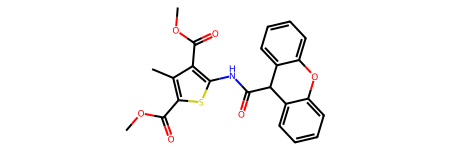

In [4]:
Chem.MolFromSmiles(data['Smiles'].iloc[1])

In [5]:
from splitter import Splitter

splitter = Splitter()
data['substructures'] = data['Smiles'].progress_apply(lambda smi: splitter.get_substructures_smiles_and_merged(smi))

100%|██████████| 10000/10000 [01:14<00:00, 134.51it/s]


In [6]:
data = data.reset_index(drop = True)

In [7]:
data['Smiles'].iloc[91]

'C[C@H]1CCC(=O)[C@@]2(C)CC=C(C(C)(C)O)C[C@H]12'

In [8]:
data['substructures'].iloc[110]

['CN',
 'CC',
 'O',
 'c1ccccc1',
 'CCC(=O)O',
 'N',
 'c1ccccc1',
 'C=O',
 'C1CCCC1',
 'c1ccc2ocnc2c1',
 '$',
 'CCO',
 'Oc1ccccc1',
 'CCNC',
 'CC(N)C(=O)O',
 'CNc1nc2ccccc2o1',
 'Nc1ccccc1',
 'O=CC1CCCC1',
 'O=Cc1ccccc1',
 'O=C(O)CCc1ccccc1']

In [9]:
Chem.MolFromSmiles('C[n]1cnc2N(C)C(=O)N(C)C(=O)c12').GetNumAtoms()

14

### Dropping too large substructures

In [10]:
dropping = set()
for i in range(len(data['substructures'])):
    for j in data['substructures'].iloc[i]:
        if j != '$':
            if Chem.RemoveHs(Chem.MolFromSmiles(j)).GetNumAtoms() > 30:
                dropping.add(i)
            if len(data['substructures'].iloc[i]) < 3 and Chem.RemoveHs(Chem.MolFromSmiles(j)).GetNumAtoms() > 25:
                dropping.add(i)

In [11]:
len(dropping)

189

In [12]:
data = data.drop(index = dropping).reset_index(drop = True)
data.head()

,Molecular Weight,Bioactivities,AlogP,Polar Surface Area,CX Acidic pKa,CX Basic pKa,Smiles,ecfp1,ecfp2,ecfp3,substructures
0,478.57,12.0,5.88,52.83,NaN,4.26,COc1cc(C2(C)CCCc3nc(SCc4ncccn4)n(-c4ccc(F)cc4)...,"['2246728737', '864674487', '3217380708', '321...","['3975275337', '2076190208', '1135286194', '99...","['932712697', '2628046163', '3102147921', '424...","[CO, CC1(c2ccc(F)cc2)CCCc2nc[nH]c21, S, C, c1c..."
1,437.47,17.0,4.51,90.93,10.14,NaN,COC(=O)c1sc(NC(=O)C2c3ccccc3Oc3ccccc32)c(C(=O)...,"['2246728737', '864674487', '2246699815', '864...","['3975275337', '2154935424', '2827868305', '15...","['1673980810', '3163669616', '2541195453', '15...","[CO, C=O, Cc1ccsc1, N, O=CC1c2ccccc2Oc2ccccc21..."
2,1010.29,4.0,NaN,NaN,NaN,NaN,CC[C@H]1OC(=O)C[C@@H](O)[C@H](C)[C@@H](O[C@@H]...,"['2246728737', '2245384272', '2976033787', '31...","['3542456614', '3594356142', '1916236386', '26...","['3834501247', '3352858976', '4210593593', '29...","[CC, CC1=C\CCOC(=O)C[C@@H](O)[C@H](C)CCC[C@@H]..."
3,337.41,2.0,1.67,70.69,7.32,NaN,Cc1cccc(-n2cc(C(=O)N3CCC[C@@H]([n+]4cc[nH]c4)C...,"['2246728737', '3217380708', '3218693969', '32...","['422715066', '3207567135', '951226070', '9851...","['950023157', '4244175903', '3692055567', '390...","[Cc1ccccc1, c1c[nH]nn1, C=O, c1c[n+]([C@@H]2CC..."
4,504.41,1.0,5.48,83.91,4.23,NaN,CCOC(=O)[C@H](C1CC1)N1C(=O)[C@@H](CC(=O)O)C[C@...,"['2246728737', '2245384272', '864674487', '224...","['3542456614', '3994088662', '2222715027', '40...","['2072239802', '3899543322', '3540073353', '17...","[CC, O, CC=O, C1CC1, O=C1CCCCN1, CC(=O)O, Clc1..."


In [13]:
data['substructures'].iloc[0]

['CO',
 'CC1(c2ccc(F)cc2)CCCc2nc[nH]c21',
 'S',
 'C',
 'c1cncnc1',
 'Fc1ccccc1',
 '$',
 'COc1cc(C2(C)CCCc3nc[nH]c32)ccc1F',
 'CS',
 'Cc1ncccn1',
 'CC1(c2ccc(F)cc2)CCCc2ncn(-c3ccc(F)cc3)c21',
 'CC1(c2ccc(F)cc2)CCCc2nc(S)[nH]c21']

In [ ]:
cnt = 0
for i in range(len(data['substructures'])):
    if data['substructures'].iloc[i][-1:] == ['$']:
        if data['substructures'].iloc[i] == ['$']:
            print("!!!   ",data['Smiles'].iloc[i])
        else:
            print(data['Smiles'].iloc[i])
            print(i)
        cnt+=1

C[C@H]1CCC(=O)[C@@]2(C)CC=C(C(C)(C)O)C[C@H]12
90
NCCCCC1(C(=O)O)CCCCCP1(=O)O.O=C(O)C(F)(F)F
100
Fc1cnc2[nH]ccc2c1
119
CNC(=S)N/N=C(\C)c1ccc(C)c(C)c1
167
Cc1cc(C)cc(/N=N/c2cccc(=O)c(O)c2)c1
174
Cn1nc(S(N)(=O)=O)sc1=N
193
Cc1c2cccn2c2ccccc2[n+]1C.[I-]
301
Fc1cccc(F)c1/C=N/Nc1ccccn1
374
CC1SC(N/N=C/c2ccco2)=NC1=O
445
O=[N+]([O-])c1cc2c(c3cccnc13)COCO2
464
CC1(C#N)C=CC(=O)C(C#N)=C1
489
O=C1NCCCC12CCCNC2
633
CN1CCc2ccccc2-c2cc(O)c(O)cc2C1
635
Cc1ccccc1[SeH]
708
[SeH]c1ccccc1
712
C[C@]12CC[C@H]3[C@@H](CCC4=C[C@@H](O)CC[C@@]43C)[C@@H]1CC[C@@H]2O
721
O=c1ccc2cccc(Br)c2[nH]1
731
Cl.c1cc2c3c(c1)[C@H]1CCC[C@H]1CN3CCNC2
733
Nc1ccc(/N=N/c2ccccc2)c(N)c1
783
FC(F)(F)C(F)(F)Cl
791
CN1Cc2sc([N+](=O)[O-])cc2C(c2ccc(Cl)cc2)C1
795
Cc1ccc(/C=N/Nc2cc(C)c3ccccc3n2)s1
796
O=[N+]([O-])c1cccc(Cl)c1
956
Cc1ccc2[nH]c(=O)c(O)cc(=O)c2c1C
971
N#Cc1c(N)[n+]([O-])c2cc(F)c(F)cc2[n+]1[O-]
986
O=NN1CCCCCC1
1023
NC12CC3CC(CC(C3)O1)C2
1058
NS(=O)(=O)c1cc([N+](=O)[O-])ccc1Cl
1134
Cc1cc(S(=O)(=O)c2cc(F)cc(F)c2)cc2c3c(oc12)CC

In [15]:
cnt

304

### Dropping long substructures

In [16]:
dropping = []
for i in range(len(data['substructures'])):
    l = 0
    for j in data['substructures'].iloc[i]:
        if j != ['$']:
            l +=1
    if l > 22:
        dropping.append(i)
data = data.drop(index = dropping).reset_index(drop = True)

In [17]:
len(data['substructures'])

9520

In [18]:
from descriptors_aggregator import Aggregator

agg = Aggregator()

In [19]:
data['descriptors'] = data['substructures'].progress_apply(lambda arr: [agg.aggregate(i) for i in arr])

  0%|          | 30/9520 [00:11<1:01:17,  2.58it/s][23:43:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[23:43:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[23:43:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[23:43:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[23:43:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[23:43:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[23:43:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[23:43:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[23:43:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[23:43:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[23:43:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[23:43:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[23:43:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[23:43:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[23:43:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[23:43:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[23:43:45] UFFTYPER: Unrecognized atom type: S_6+6 (1)
[23:43:45] UFF

### Saving

In [20]:
data.to_csv('out-10k.csv')

# Loading

In [1]:
import pandas as pd
from tqdm import tqdm
tqdm.pandas()
import torch

def read_data():
    data = pd.read_csv('out-1.csv')
    import ast

    def string_to_array(input_string):
        try:
            # Use ast.literal_eval to safely evaluate the string as a Python literal
            result = ast.literal_eval(input_string)
            return result
        except (SyntaxError, ValueError) as e:
            print(f"Error parsing the string: {e}")
            return None
    data['descriptors'] = data['descriptors'].progress_apply(lambda x: string_to_array(x))
    return data

In [2]:
data = read_data()
data['descriptors'][0]

100%|██████████| 508/508 [00:00<00:00, 1231.81it/s]


[[[2, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [3],
  [1, 1, 0, 0],
  [6],
  [4],
  [4],
  [2],
  [0],
  [0]],
 [[0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [1],
  [0, 0, 0, 0],
  [3],
  [0],
  [3],
  [2],
  [0],
  [0]],
 [[2, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [2],
  [1, 0, 0, 0],
  [7],
  [1],
  [4],
  [2],
  [0],
  [0]],
 [[0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [1],
  [0, 0, 0, 0],
  [2],
  [0],
  [3],
  [2],
  [0],
  [0]],
 [[3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
  [6],
  [0, 0, 0, 6],
  [9],
  [27],
  [4],
  [2],
  [6],
  [1]],
 [[5, 11, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [6],
  [6, 0, 0, 0],
  [17],
  [27],
  [4],
  [2],
  [6],
  [1]],
 [[5, 11, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [6],
  [6, 0, 0, 0],
  [17],
  [27],
  [4],
  [2],
  [6],
  [1]],
 '$',
 [[2, 5, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [4],
  [2, 1, 0, 0],
  [8],
  [9],
  [4],
  [2],
  [0],
  [0]],
 [[2, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [3],
  [2, 0, 0, 0],
  [8],
  [4],
  [4],
  [2],
  [0],
  [0]],
 [[3, 3, 1, 3, 0, 0, 0, 0, 0, 0, 

### Shifting descriptors

In [3]:
import shifter as sh
from importlib import reload
reload(sh)

shifter = sh.Shifter()

In [4]:
data['descriptors'][0]

[[[2, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [3],
  [1, 1, 0, 0],
  [6],
  [4],
  [4],
  [2],
  [0],
  [0]],
 [[0, 3, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [1],
  [0, 0, 0, 0],
  [3],
  [0],
  [3],
  [2],
  [0],
  [0]],
 [[2, 6, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [2],
  [1, 0, 0, 0],
  [7],
  [1],
  [4],
  [2],
  [0],
  [0]],
 [[0, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [1],
  [0, 0, 0, 0],
  [2],
  [0],
  [3],
  [2],
  [0],
  [0]],
 [[3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0],
  [6],
  [0, 0, 0, 6],
  [9],
  [27],
  [4],
  [2],
  [6],
  [1]],
 [[5, 11, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [6],
  [6, 0, 0, 0],
  [17],
  [27],
  [4],
  [2],
  [6],
  [1]],
 [[5, 11, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [6],
  [6, 0, 0, 0],
  [17],
  [27],
  [4],
  [2],
  [6],
  [1]],
 '$',
 [[2, 5, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
  [4],
  [2, 1, 0, 0],
  [8],
  [9],
  [4],
  [2],
  [0],
  [0]],
 [[2, 6, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
  [3],
  [2, 0, 0, 0],
  [8],
  [4],
  [4],
  [2],
  [0],
  [0]],
 [[3, 3, 1, 3, 0, 0, 0, 0, 0, 0, 

In [5]:
for descriptors_of_substructures in data['descriptors']:
    shifter.shift(descriptors_of_substructures)

In [25]:
import tokenizer as tokenizer
reload(tokenizer)
tokenized_descriptors = tokenizer.tokenize(data['descriptors'], max_length=513)

In [26]:
len(tokenized_descriptors['input_ids'])

508

In [27]:
def mlm(tensor):
    print(tensor)
    # create random array of floats with equal dims to tensor
    rand = torch.rand(tensor.shape)
    # mask random 15% where token is not 0 <s>, 1 <pad>, or 2 <s/>
    mask_arr = (rand < .15) * (tensor != 0) * (tensor != 1) * (tensor != 2)
    # loop through each row in tensor (cannot do in parallel)
    for i in range(tensor.shape[0]):
        # get indices of mask positions from mask array
        selection = torch.flatten(mask_arr[i].nonzero()).tolist()
        # mask tensor
        tensor[i, selection] = 4
    return tensor

In [28]:
def tokenize_descriptors(data, end):
    input_ids = []
    mask = []
    labels = []
    # for descriptors in tqdm(data['descriptors'][:end]):
    sample = tokenizer.tokenize(data['descriptors'], max_length=512)
    
    labels.append(torch.tensor(sample['input_ids']))
    mask.append(torch.tensor(sample['attention_mask']))
    input_ids.append(mlm(labels[-1].detach().clone())) # mask ~15% of tokens to create inputs
    
    input_ids = torch.cat(input_ids)
    mask = torch.cat(mask)
    
    labels = torch.cat(labels)
    return input_ids, mask, labels

In [29]:
input_ids, mask, labels = tokenize_descriptors(data, 1)

tensor([[ 0,  8, 60,  ...,  1,  1,  1],
        [ 0, 12, 62,  ...,  1,  1,  1],
        [ 0,  8, 62,  ...,  1,  1,  1],
        ...,
        [ 0, 13, 61,  ...,  1,  1,  1],
        [ 0, 10, 62,  ...,  1,  1,  1],
        [ 0, 13, 64,  ...,  1,  1,  1]])


In [34]:
input_ids[0]

tensor([   0,    8,   60,    4,  156,  206,  256,  306,  356,  406,    4,  506,
         556,  609,  657,  957, 1256, 1556, 1862, 2160, 4160, 4166,    4, 4223,
           3,    4,    4,  106,  157,    4,  256,  306,  356,    4,  456,  506,
         556,  607,  656,  956, 1256, 1556, 1859, 2156, 4159, 4166, 4173, 4223,
           4,    8,   62,  106,  156,  206,  256,  306,  356,  406,  456,  506,
           4,  608,  657,  956, 1256, 1556, 1863, 2157, 4160,    4, 4173, 4223,
           4,    6,   58,  107,  156,  206,    4,  306,  356,    4,    4,  506,
         556,  607,  656,  956, 1256,    4, 1858, 2156,    4, 4166, 4173, 4223,
           3,    9,   59,    4,  159,  206,  256,  306,  356,  406,  456,  506,
         556,  612,  656,  956, 1256, 1562, 1865, 2183, 4160, 4166, 4179, 4224,
           3,   11,   67,  106,    4,  206,  256,  306,  356,  406,  456,    4,
         556,  612,  662,  956,    4, 1556, 1873, 2183, 4160, 4166, 4179, 4224,
           3,   11,   67,    4,  157,  2

In [35]:
mask[0]

tensor([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [33]:
labels[0]

tensor([   0,    8,   60,  107,  156,  206,  256,  306,  356,  406,  456,  506,
         556,  609,  657,  957, 1256, 1556, 1862, 2160, 4160, 4166, 4173, 4223,
           3,    6,   59,  106,  157,  206,  256,  306,  356,  406,  456,  506,
         556,  607,  656,  956, 1256, 1556, 1859, 2156, 4159, 4166, 4173, 4223,
           3,    8,   62,  106,  156,  206,  256,  306,  356,  406,  456,  506,
         556,  608,  657,  956, 1256, 1556, 1863, 2157, 4160, 4166, 4173, 4223,
           3,    6,   58,  107,  156,  206,  256,  306,  356,  406,  456,  506,
         556,  607,  656,  956, 1256, 1556, 1858, 2156, 4159, 4166, 4173, 4223,
           3,    9,   59,  106,  159,  206,  256,  306,  356,  406,  456,  506,
         556,  612,  656,  956, 1256, 1562, 1865, 2183, 4160, 4166, 4179, 4224,
           3,   11,   67,  106,  157,  206,  256,  306,  356,  406,  456,  506,
         556,  612,  662,  956, 1256, 1556, 1873, 2183, 4160, 4166, 4179, 4224,
           3,   11,   67,  106,  157,  2

In [ ]:
# unique_symbols_list = []
# for substructure in susbstr_merged:
#     if '$' == substructure:
#             continue
#     for descriptor in substructure:
#         for number in descriptor:
#             unique_symbols_list.append(number)

# unique_symbols = set(unique_symbols_list)

# vocab = {i: symbol for i, symbol in enumerate(unique_symbols)}

In [ ]:
# vocab